# Chapter 3 - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Load Datasets

In [2]:
advertising = pd.read_csv('Data/Advertising.csv', usecols = [1,2,3,4])
advertising.info()
advertising.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
credit = pd.read_csv('Data/Credit.csv', usecols = list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


pd.read_csv( )中， na_values='?'则是将问号识别为nullValue
<br>dropna( )是将缺失的数据滤除

In [4]:
auto = pd.read_csv('Data/Auto.csv', na_values = '?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## Simple Linear Regression
### Figure 3.1 - Least squares fit 

Seaborn介绍 Seaborn是一种基于matplotlib的图形可视化python libraty。 它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
<br>order=1是拟合一次曲线，拟合二次曲线通过order=2设置

(0, 28.281704763383004)

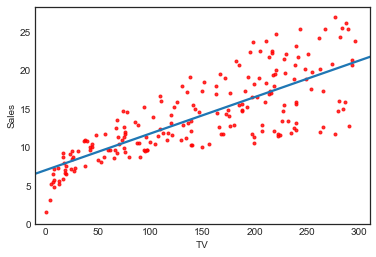

In [5]:
sns.regplot(x = advertising.TV, y = advertising.Sales, order=1, ci=None, scatter_kws={'color':'r','s':9})
plt.xlim(-10,310)
plt.ylim(ymin = 0)

### Figure3.2 - Regression coefficients - RSS 

RSS: residual sum of squares:

$$RSS = e_{1}^2 + e_{2}^2 +...+ e_{n}^2$$

<br><center>or,   $RSS = (y_1 - \beta_0 -\beta_1x_1)^2 + (y_2 - \beta_0 -\beta_1x_2)^2 +...+ (y_n - \beta_0 -\beta_1x_n)^2$
<br><br>
<center>$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$, $\beta_0 = \bar{y}-\beta_1x$

使用最小二乘法进行回归:

sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

官方说明：

coef_ : array, shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

intercept_ : array

Independent term in the linear model.

model.coef_ 和 model.intercept_ 属于 Model 的属性， 例如对于 LinearRegressor 这个模型，这两个属性分别输出模型的斜率和截距（与y轴的交点）。

In [6]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.04753664]
14.0225


numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

在指定的间隔内返回均匀间隔的数字。

返回num均匀分布的样本，在[start, stop]。

这个区间的端点可以任意的被排除在外。

meshgrid函数就是用两个坐标轴上的点在平面上画网格(当然这里传入的参数是两个的时候)。当然我们可以指定多个参数，比如三个参数，那么我们的就可以用三个一维的坐标轴上的点在三维平面上画网格。


In [7]:
#create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2,50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
#xx: 50*50  yy: 50*50
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

<center>$RSS = (y_1 - \beta_0 -\beta_1x_1)^2 + (y_2 - \beta_0 -\beta_1x_2)^2 +...+ (y_n - \beta_0 -\beta_1x_n)^2$

numpy.ravel() vs numpy.flatten()

首先声明两者所要实现的功能是一致的（将多维数组降位一维），两者的区别在于返回拷贝（copy）还是返回视图（view），numpy.flatten()返回一份拷贝，对拷贝所做的修改不会影响（reflects）原始矩阵，而numpy.ravel()返回的是视图（view，也颇有几分C/C++引用reference的意味），会影响（reflects）原始矩阵。

In [8]:
# Calculate Z-values (RSS) based on grid of coefficients
for (i,j), v in np.ndenumerate(Z):
    Z[i,j] = ((y - (xx[i,j] + X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_ + regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

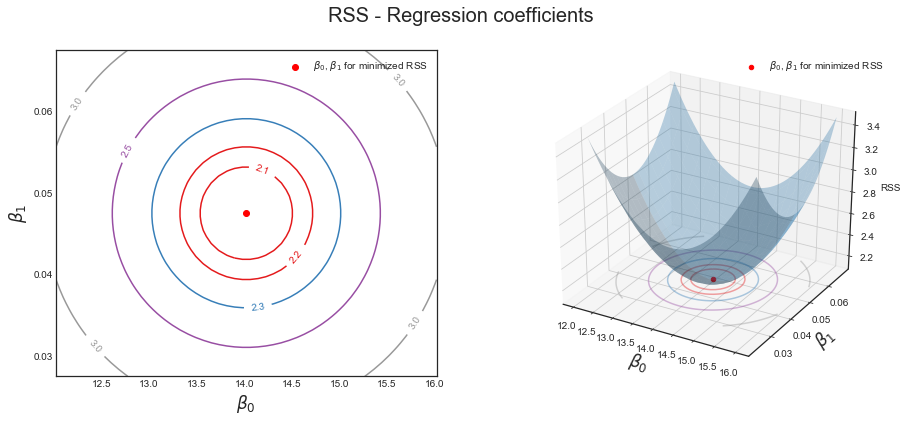

In [9]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize = 20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
# contour 三维等高线
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label = min_RSS)
ax1.clabel(CS, inline = True, fontsize = 10, fmt = '%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
           alpha = 0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')

# set_xlim：设置xaxis的数据限制。
# set_xbound：设置x轴的下限和上限数值范围。

ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02, 0.07)

#settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize = 17)
    ax.set_ylabel(r'$\beta_1$', fontsize = 17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()

### Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels

In [10]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [11]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.102530583131351

### Table 3.1 & 3.2 - Scikit-learn

In [12]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


In [13]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

In [14]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

## 3.2 Multiple Linear Regression
### Table 3.3 - Statsmodels

In [15]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [16]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 & 3.6 - Statsmodels

In [17]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        12:49:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation Matrix

In [18]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Figure 3.5 - Multiple Linear Regression

In [19]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].values
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [20]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [21]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j]*regr.coef_[0]+B2[i,j]*regr.coef_[1])

Text(0.5, 0, 'Sales')

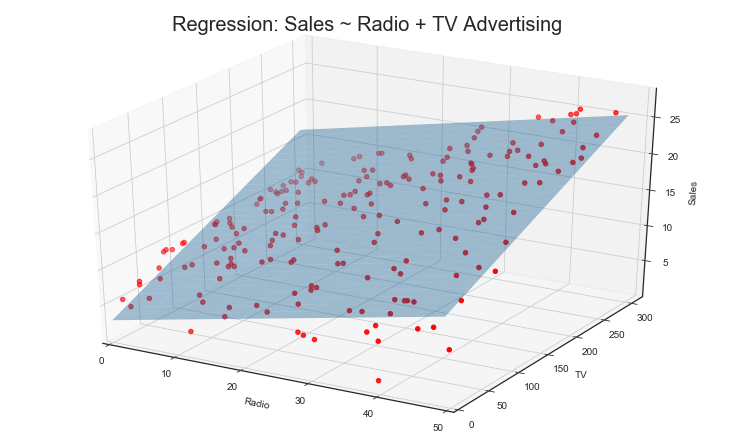

In [22]:
# Create plot
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize = 20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales')

## 3.3 Other Considerations in the Regression Model
### Figure 3.6

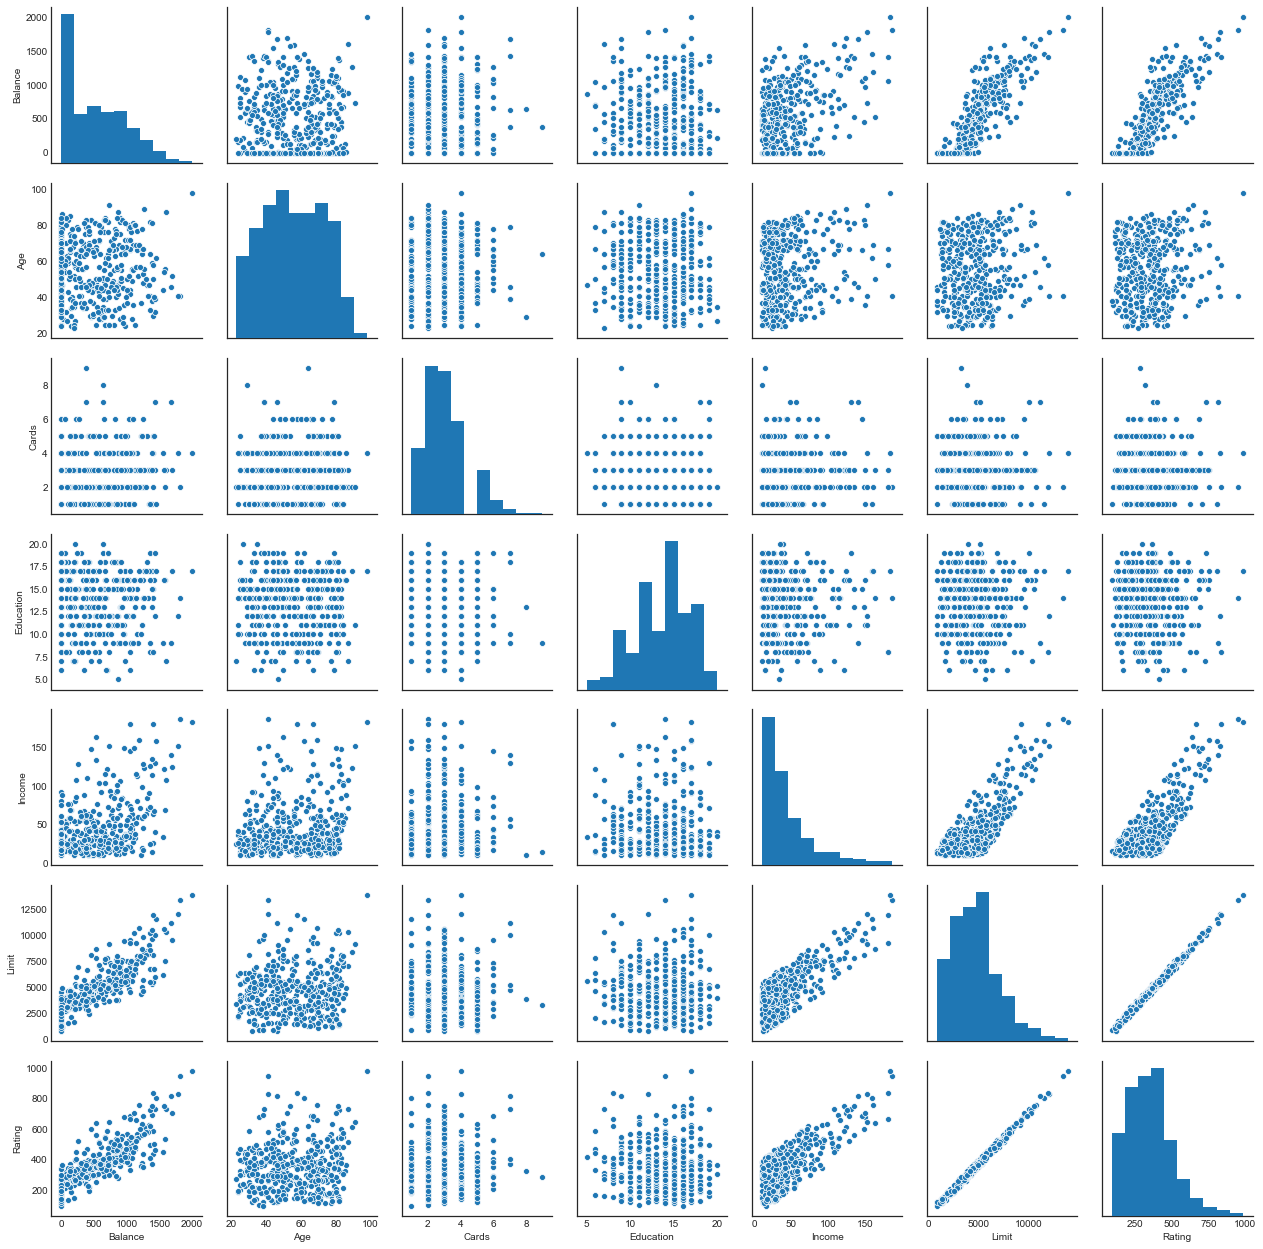

In [23]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

### Table 3.7

In [24]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


### Table 3.8

In [25]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### Table 3.9 - Interaction Variables

In [26]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Figure 3.7 - Interaction between qualitative and quantative variables

In [27]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


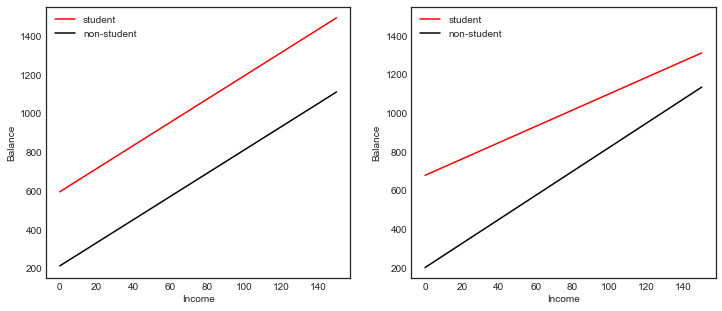

In [37]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2'] + 150*regr1['Income'])

non_student1 = np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                            regr2['Intercept']+regr2['Student2']+
                            150*(regr2['Income'] + regr2['Income:Student2']))

non_student2 = np.linspace(regr2['Intercept'], regr2['Intercept'] + 150*regr2['Income'])

#create plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### Figure 3.8 - Non-linear relationships

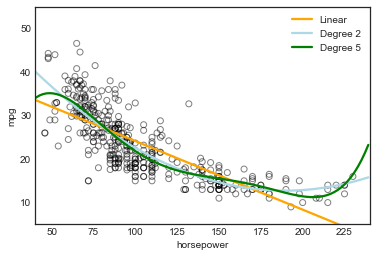

In [43]:
# With Seaborn's regplot() you can easily plot higher order polynomia.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None',edgecolors='k',alpha=.5)
sns.regplot(auto.horsepower, auto.mpg, ci = None, label = 'Linear', scatter = False, color = 'orange')
sns.regplot(auto.horsepower, auto.mpg, ci = None, label = 'Degree 2', order = 2, scatter = False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')

plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Table 3.10

In [44]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [48]:
est = smf.ols('mpg ~ horsepower + horsepower2',auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### Figure 3.9

In [59]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].values
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

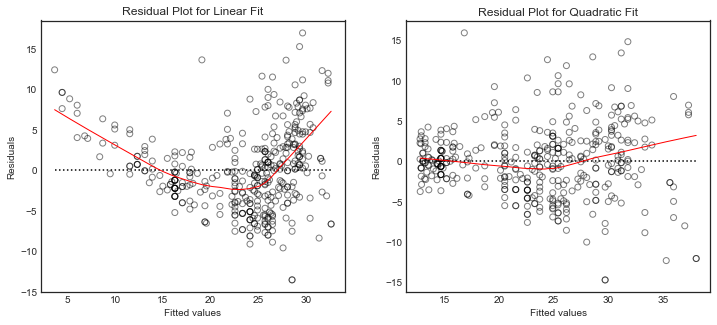

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left Plot
sns.regplot(auto.pred1, auto.resid1, lowess = True,
            ax=ax1, line_kws={'color':'r','lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax = ax1.xaxis.get_data_interval()[1],
           linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax = ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0, xmin=ax2.xaxis.get_data_interval()[0],
            xmax=ax2.xaxis.get_data_interval()[1], linestyle='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')